In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal

In [2]:
test = 0.1
na = 256        # analysis step
ns = na         # synthesis step
s_win = 2048    # window length
DAFx_in, FS = sf.read('audios/redwheel.wav')

In [3]:
def princarg(phase_in: float):
    return (phase_in + np.pi) % (-2 * np.pi) + np.pi

In [4]:
wa = signal.windows.hann(s_win, sym=False) # analysis window
ws = wa                                    # synthesis window
L = len(DAFx_in)

DAFx_in = np.pad(DAFx_in, (s_win, s_win - (L % na)), 'constant') / np.max(np.abs(DAFx_in))
DAFx_out = np.zeros(len(DAFx_in))

devcent = 2 * np.pi * na / s_win
vtest = test * devcent
grain = np.zeros(s_win)
theta1 = np.zeros(s_win)
theta2 = np.zeros(s_win)

In [5]:
pin = 0
pout = 0
pend = len(DAFx_in) - s_win

while (pin < pend):
    grain = DAFx_in[pin:(pin + s_win)] * wa
    f = np.fft.fft(np.fft.fftshift(grain))
    
    theta = np.angle(f)
    dev = princarg(theta - 2*theta1 + theta2);
    ft = f * (np.abs(dev) < vtest)
    grain  = np.fft.fftshift(np.real(np.fft.ifft(ft))) * ws
    theta2 = theta1
    theta1 = theta
    
    DAFx_out[pout:(pout + s_win)] += grain
    
    pin  = pin + na
    pout = pout + ns

In [6]:
DAFx_out = DAFx_out[s_win:(s_win + L)] * np.max(np.abs(DAFx_in))/ np.max(np.abs(DAFx_out))
print(DAFx_out.shape)
sf.write('audios/redwheel_stable.wav', DAFx_out, FS)

(109589,)


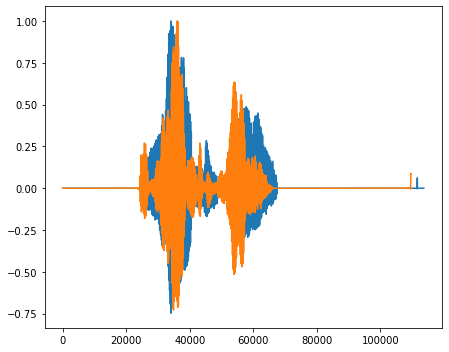

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(DAFx_in)
# plt.subplot(122)
plt.plot(DAFx_out)
plt.tight_layout()